In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

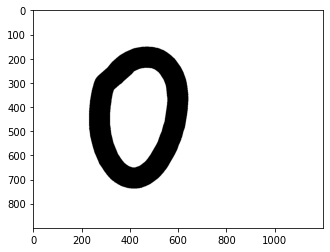

In [ ]:
img_str = "img001-001.png"
img = cv2.imread(img_str)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

[255 255 255 ... 255 255 255]


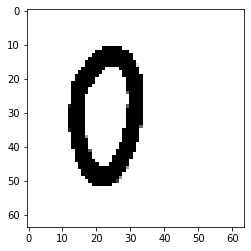

In [ ]:
dim = (64, 64)
img = cv2.imread("img001-001.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dim)
plt.imshow(img, cmap="gray")
img = img.reshape(4096,)
print(img)

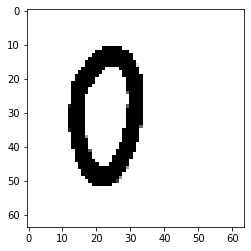

In [ ]:
sampleX = np.reshape(img, (64,64))
plt.imshow(sampleX, cmap="gray")

In [2]:
strDataset = 'image.csv'

In [3]:
index = pd.read_csv('english.csv')
index.head()
index['label']

0       0
1       0
2       0
3       0
4       0
       ..
3405    z
3406    z
3407    z
3408    z
3409    z
Name: label, Length: 3410, dtype: object

In [5]:
dataset = pd.read_csv(strDataset)

In [6]:
dataset = dataset.iloc[1: , :]

In [7]:
dataset.shape

(3410, 4096)

In [8]:
sampleX = dataset.iloc[4, 0:].values
sampleX = np.reshape(sampleX, (64,64))

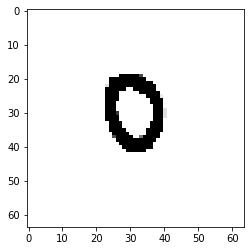

In [9]:
plt.imshow(sampleX, cmap="gray")

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(index['label'])

In [11]:
y

array([ 0,  0,  0, ..., 61, 61, 61])

In [12]:
from sklearn.model_selection import train_test_split

X = dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [15]:
X_train.shape

(2387, 4096)

**ANN**

In [16]:
#ANN
ann = Sequential()

#capa de entrada
ann.add(Dense(input_dim=4096, units=2387, activation='relu', kernel_initializer='uniform'))

#primera capa oculta
ann.add(Dense(units=5000, activation='relu', kernel_initializer='uniform'))
ann.add(layers.BatchNormalization())
# Add a Flatten Layer
ann.add(layers.Flatten())
# Add a Dense layer Layer
ann.add(layers.Dense(512, activation = 'relu'))
# Add a Dropout Layer
ann.add(layers.Dropout(0.5))
#capa de salida
ann.add(Dense(units=62, activation='softmax'))

In [17]:
callback_a = ModelCheckpoint(filepath='best_model_ann.h5', monitor='accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')

In [20]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = ann.fit(X, y, epochs=100, callbacks=[callback_a, earlystop])

Epoch 1/100
107/107 [==============================] - 21s 200ms/step - loss: 3.1159 - accuracy: 0.2249
Epoch 2/100
107/107 [==============================] - 21s 198ms/step - loss: 2.7047 - accuracy: 0.3062
Epoch 3/100
107/107 [==============================] - 21s 198ms/step - loss: 2.4259 - accuracy: 0.3595
Epoch 4/100
107/107 [==============================] - 21s 198ms/step - loss: 2.2599 - accuracy: 0.3965
Epoch 5/100
107/107 [==============================] - 21s 199ms/step - loss: 2.0417 - accuracy: 0.4393
Epoch 6/100
107/107 [==============================] - 21s 199ms/step - loss: 1.9129 - accuracy: 0.4730
Epoch 7/100
107/107 [==============================] - 21s 199ms/step - loss: 1.7951 - accuracy: 0.4927
Epoch 8/100
107/107 [==============================] - 21s 199ms/step - loss: 1.6714 - accuracy: 0.5320
Epoch 9/100
107/107 [==============================] - 21s 201ms/step - loss: 1.5737 - accuracy: 0.5607
Epoch 10/100
107/107 [==============================] - 21s 200m

In [ ]:
ann.save('ann2.h5')

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
ann_predicts = ann.predict(X_test)

In [ ]:
ann_predicts.shape

(1023, 62)

In [ ]:
ann_predict_vals = np.argmax(ann_predicts, axis=1)
ann_predict_vals

array([18, 13, 18, ..., 18, 18, 18])

In [ ]:
y_test

array([57, 32,  3, ..., 19, 25, 21])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ann_predict_vals)

0.02932551319648094